# RETRIEVING DOCUMENTS

### READING .TXT FILE

In [1]:
# First file is txt file which is saved on my desktop will be using os library to reach dir
import os 
path = "Novels/"


for file in os.listdir(path):
    if file.endswith(".txt"):
        documentName = file.split(".txt")[0]
        file_path = path + file
        # reading the data
        with open(file_path, 'r') as f:
            #save the content 
            document_1 = f.read()

In [2]:
#Show the content of Martial_Peak
document_1[:250]

"\ufeffThe Project Gutenberg eBook of Another Man's Shoes, by Victor Bridges\n\nThis eBook is for the use of anyone anywhere in the United States and\nmost other parts of the world at no cost and with almost no restrictions\nwhatsoever. You may copy it, give i"

### READING HTML 

In [3]:
import requests
from bs4 import BeautifulSoup
import pprint

#Accessing the HTML content from webpage
#There are 100 chapters , 
document_2 =""
for i in range(0,100):
    htm_url ="https://www.wuxiaworld.com/novel/martial-world/mw-chapter-"+ str(i)
    r = requests.get(htm_url)
    soup = BeautifulSoup(r.content, 'html5lib')
    #contents saved under div tag <div id ="chapter-outer"> ...
    table = soup.find("div", attrs= {"id":"chapter-content"})
    
    try:
        all_paragraphs = table.find_all("p")
        for p in all_paragraphs:
            document_2 += p.text
    except:
        pass
        

In [4]:
#Show the content of second document
document_2[:250]

'Chapter 0 – Magic Cube………In the vast and limitless expanse of mist and snow, endless ice shards swirled in the wind and collided in a violent maelstrom. Subzero temperatures chilled one’s bones to a freezing cold temperature, as if it would turn even'

In [5]:
def cleanText(rawText):
    """
    Input : str long raw text
    
    importing re, and string library to clean the text
    
    Return : str 
    
    """
    import re
    import string
    rawText = rawText.lower()
    
    rawText = re.sub(r'[^A-Za-z0-9_/s]+', " ", rawText)
    rawText = re.sub(r'[0-9]+[A-Za-z]?',"", rawText)
    rawText = re.sub(r'/s+', " ", rawText)
    
    text = rawText.translate(str.maketrans("","",string.punctuation))
    
    return text
    
def removeStopWords(cleanText, unwanted_words=[]):
    """
    Input
    cleanText : str
    unwated_wors : list of string words 
    
    imported nltk library to tokenize words, and removing stopwords
    
    Return : str (long text)
    """
    import nltk
    from nltk.corpus import stopwords
    
    stop_words = stopwords.words("english")
    stop_words.extend(unwanted_words)
    
    word_list = []
    for word in nltk.word_tokenize(cleanText):
        word=word.strip()
        if ((word  not in stop_words) and (len(word) >= 2)):
            word_list.append(word)
            
        else:
            pass
        
            
    
    
    
    return " ".join(word_list)

In [6]:
#Downloaded json file, which includes extra stopwords

import json
with open("Novels/stop_words_english.json") as f:
    unwanted = json.load(f)
    
print(unwanted[0:10])

['able', 'about', 'above', 'abroad', 'according', 'accordingly', 'across', 'actually', 'adj', 'after']


In [7]:
document_1.count("could")

213

In [8]:
#Updatae document key contents after cleaning and removing stopwords

document_1 = removeStopWords(cleanText(document_1),unwanted)
document_2 = removeStopWords(cleanText(document_2),unwanted)
    
   


In [9]:
document_1[:255]

'project gutenberg ebook shoes victor bridges ebook united parts cost restrictions whatsoever copy terms project gutenberg license included ebook online gutenberg org located united check laws country located ebook title shoes author victor bridges release'

In [10]:
"""
    Lemmatize or Stemming is used to find root of the words

    Lemmatizing checks the word post tag : such as noung adverb adjectvie and noun 
    that is why takes longer processing

""" 


def get_wordnet_pos(word):
    """
    Helper function to return word with its tag based on wordnet
    Input
    word : str
    
    Return touple==> (word, tag)
    
    """
    import nltk
    from nltk.corpus import wordnet
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return (word, tag_dict.get(tag, wordnet.NOUN))


def lemmatizeText(text):
    
    import nltk
    from nltk.stem import WordNetLemmatizer
    lemmetizer = WordNetLemmatizer()
    # Tokenize: Split the sentence into words
    word_list = nltk.word_tokenize(text)
    
    
    lemma_list = [lemmetizer.lemmatize(get_wordnet_pos(word)[0],get_wordnet_pos(word)[1]) for word in word_list]
    
    return " ".join(lemma_list)


#updating the document again
fdocument_1 = lemmatizeText(document_1)
document_2 = lemmatizeText(document_2)
    
   


In [11]:
document_1[:250]

'project gutenberg ebook shoes victor bridges ebook united parts cost restrictions whatsoever copy terms project gutenberg license included ebook online gutenberg org located united check laws country located ebook title shoes author victor bridges re'

In [12]:
document_2[:250]

'chapter magic cube vast limitless expanse mist snow endless ice shard swirl wind collide violent maelstrom subzero temperature chill bone freeze cold temperature turn soul ice snowfall realm myriad dimension realm god bleak hopeless land endless blin'

In [13]:
# Document Frequency will be a dictionary where words are key and values are the count of occurence in the content

def documentFrequency(text):
    
    import nltk
    freq = {}
    # list has elements which are pair, ('ears', 'n')
    
    list_of_words =[word for word in nltk.word_tokenize(text)]
    
    # Frequency count 
    for word in list_of_words:
        if word in freq.keys():
            freq[word] += 1
        else:
            freq[word] =1
    
    # sort the freq
    return {word:freq for word, freq in sorted(freq.items(), key =lambda item : item[1], reverse = True)}
  


frequency_1 = documentFrequency(document_1)
frequency_2 = documentFrequency(document_2)



In [14]:
# Printing top 5 words in Martial Peak Novel

count =0 

for word, freq in frequency_1.items():
    
    print("{} appear {} times".format(word, freq))
    
    count += 1
    
    if count == 5:
        break

billy appear 362 times
northcote appear 247 times
mercia appear 183 times
good appear 175 times
maurice appear 170 times


In [15]:
# Printing top 5 words in Fields of Gold Novel
 
count =0 

for word, freq in frequency_2.items():
    
    print("{} appear {} times in second document".format(word, freq))
    
    count += 1
    
    if count == 5:
        break

lin appear 3113 times in second document
ming appear 2733 times in second document
martial appear 1277 times in second document
time appear 642 times in second document
body appear 634 times in second document


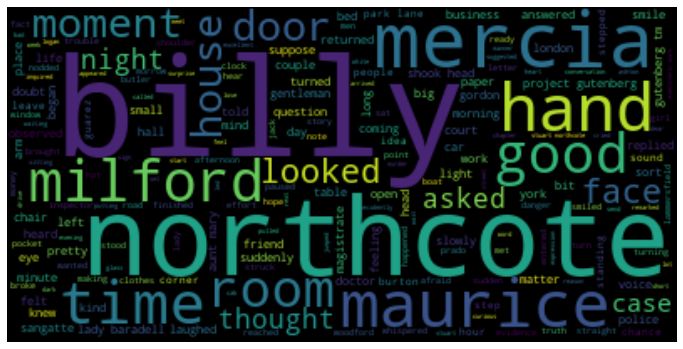

In [16]:
#WordCloud is beautiful way visualize most common words in the content


from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud().generate(document_1)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
words =["strength","attack","feel","action"]


for word in words:
    print("Word {} occuren {} times in the document \n".format(word, frequency_1[word]))



Word strength occuren 2 times in the document 

Word attack occuren 3 times in the document 

Word feel occuren 22 times in the document 

Word action occuren 6 times in the document 



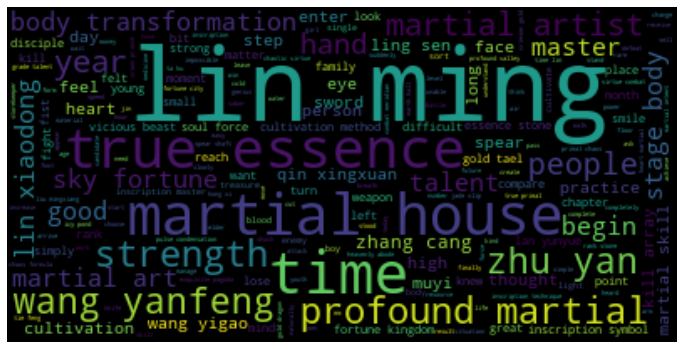

In [18]:
#Visualize most common words in Field of Gold Novel 


from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud().generate(document_2)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
words =["madam","action","time","cooking","wait"]


for word in words:
    print("Word {} occuren {} times in the document \n".format(word, frequency_2[word]))



Word madam occuren 1 times in the document 

Word action occuren 11 times in the document 

Word time occuren 642 times in the document 

Word cooking occuren 4 times in the document 

Word wait occuren 61 times in the document 



In [20]:
# what are the most common Verbs in the documents
verb_frequencies ={}


def frequency_for_tag(document, tag):
    
    frequency = {}
    
    for word in document.split(" "):
        
        word, pos_tag = get_wordnet_pos(word)
        
        if tag == pos_tag:
            
            if word in frequency.keys():
                frequency[word] += 1
            else:
                frequency[word] = 1

    return {word : freq for word, freq in sorted(frequency.items(), key = lambda items : items[1], reverse=True)}


verb_frequency_1 = frequency_for_tag(document_1,'v')
                
verb_frequency_2 = frequency_for_tag(document_2,'v')
                
        
                    
            

In [21]:
#print top 10 verbs 

count = 0
print("Document_1")
print("---------------------------------")
for word, freq in verb_frequency_1.items():
    
    print("{} appear  {} times".format(word, freq))
    
    if count == 8:
        break
    count += 1
print("---------------------------------")

Document_1
---------------------------------
looked appear  110 times
asked appear  106 times
observed appear  78 times
turned appear  74 times
nodded appear  55 times
answered appear  53 times
began appear  53 times
replied appear  47 times
laughed appear  47 times
---------------------------------


In [22]:
#print top 10 verbs 

count = 0
print("Document_2")
print("---------------------------------")
for word, freq in verb_frequency_2.items():
    
    print("{} appear  {} times".format(word, freq))
    
    if count == 8:
        break
    count += 1
print("---------------------------------")

Document_2
---------------------------------
ming appear  2733 times
ling appear  188 times
lose appear  136 times
appear appear  94 times
leave appear  55 times
happen appear  53 times
consider appear  50 times
buy appear  50 times
engrave appear  43 times
---------------------------------


In [23]:
noun_frequency_1 = frequency_for_tag(document_1,'n')
                
noun_frequency_2 = frequency_for_tag(document_2,'n')                
            

In [24]:
#print top 10 verbs 

count = 0
print("Most common Nouns in Document_2")
print("---------------------------------")
for word, freq in noun_frequency_1.items():
    
    print("{} appear  {} times".format(word, freq))
    
    if count == 8:
        break
    count += 1
print("---------------------------------")

Most common Nouns in Document_2
---------------------------------
northcote appear  247 times
mercia appear  183 times
maurice appear  170 times
door appear  153 times
room appear  140 times
hand appear  137 times
time appear  133 times
milford appear  133 times
house appear  119 times
---------------------------------


In [25]:
#print top 10 verbs 

count = 0
print("Most common Nouns in Document_2")
print("---------------------------------")
for word, freq in noun_frequency_2.items():
    
    print("{} appear  {} times".format(word, freq))
    
    if count == 8:
        break
    count += 1
print("---------------------------------")

Most common Nouns in Document_2
---------------------------------
lin appear  3113 times
martial appear  1277 times
time appear  642 times
body appear  634 times
wang appear  600 times
inscription appear  554 times
strength appear  523 times
stage appear  520 times
spear appear  490 times
---------------------------------


In [26]:
import pandas as pd

pd.to_pickle(document_1,"document_1.pickle")

pd.to_pickle(document_2,"document_2.pickle")